# Automobile Price Prediction

## Overview

This notebook focuses on predicting sales of used cars by analysing data on previously sold cars. We will be observing how different ML mod

## Import data

You can find the "Automobile Data Set" from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

We will add headers from the information available at the following address: https://archive.ics.uci.edu/ml/datasets/Automobile

We will be using panadas library to import the data

In [1]:
import pandas as pd

In [2]:
data_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

cars_data = pd.read_csv(data_path, names = headers)

We will use head() to display first 5 rows of the imported dataframe

In [3]:
cars_data.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

On close inspection we can see some missing values are replaced with ? lets replace them with numpy nan to deal with them

In [4]:
import numpy as np

cars_data.replace("?", np.nan, inplace = True)
cars_data.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

lets print the dataframe info to examine the data

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

From the information above, each column has 205 rows of data, seven columns containing missing data:
- **normalized-losses:** 41
- **num-of-doors:** 2
- **bore:** 4
- **stroke:** 4
- **horsepower:** 2
- **peak-rpm:** 2
- **price:** 4

## Dealing with missing data

Replace the numerical data with their respective means and categorical data with their frequencies

variables with mean numerical data are as follows:
- normalized-losses
- bore
- stroke
- horsepower
- peak-rpm
- price
    
variables with mean categorical data are as follows:
- num-of-doors


In [6]:
mean_normalized_losses = cars_data["normalized-losses"].astype("float").mean(axis = 0)
mean_bore = cars_data["bore"].astype("float").mean(axis = 0)
mean_stroke = cars_data["stroke"].astype("float").mean(axis = 0)
mean_horsepower = cars_data["horsepower"].astype("float").mean(axis = 0)
mean_peak_rpm = cars_data["peak-rpm"].astype("float").mean(axis = 0)

In [7]:
cars_data["normalized-losses"].replace(np.nan, mean_normalized_losses, inplace = True)
cars_data["bore"].replace(np.nan, mean_bore, inplace= True)
cars_data["stroke"].replace(np.nan, mean_stroke, inplace = True)
cars_data["horsepower"].replace(np.nan, mean_horsepower, inplace = True)
cars_data["peak-rpm"].replace(np.nan, mean_peak_rpm, inplace = True)

In [8]:
common_type_of_door = cars_data["num-of-doors"].value_counts().idxmax()
print(common_type_of_door)

four


In [9]:
cars_data["num-of-doors"].replace(np.nan, common_type_of_door, inplace = True)

Lets drop rows with missing values of price

In [10]:
cars_data.dropna(subset = ["price"], axis = 0, inplace = True)
cars_data.reset_index(drop = True, inplace = True)

In [11]:
cars_data.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               122  alfa-romero       gas        std          two   
1          3               122  alfa-romero       gas        std          two   
2          1               122  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [12]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nul

As we don't have anymore empty items lets fix the columns with their respective data types

In [13]:
cars_data[["bore", "stroke", "price", "peak-rpm", "horsepower"]] = cars_data[["bore", "stroke", "price", "peak-rpm", "horsepower"]].astype("float")
cars_data[["normalized-losses"]] = cars_data[["normalized-losses"]].astype("int")

In [14]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int32
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-nu

## Data Standardization

Data is usually collected from different agencies with different formats. (Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)

What is Standardization?
Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.

In [15]:
cars_data.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base   ...     \
0          two  convertible          rwd           front        88.6   ...      
1          two  convertible          rwd           front        88.6   ...      
2          two    hatchback          rwd           front        94.5   ...      
3         four        sedan          fwd           front        99.8   ...      
4         four        sedan          4wd           front        99.4   ...      

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard
We will need to apply **data transformation** to transform mpg into L/100km?

In [16]:
cars_data["city-L/100km"] = 235/cars_data["city-mpg"]
cars_data["highway-L/100km"] = 235/cars_data["highway-mpg"]
cars_data.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0          two  convertible          rwd           front        88.6   
1          two  convertible          rwd           front        88.6   
2          two    hatchback          rwd           front        94.5   
3         four        sedan          fwd           front        99.8   
4         four        sedan          4wd           front        99.4   

        ...         bore  stroke  compression-ratio  horsepower peak-rpm  \
0       ...         3.47    2.68                9.0       111.0   5000.0   
1       ...         3.47    2.68                9.0       111.0   5000.0   
2       ...         2.68    3.47                9.0       154.0   5000.0   
3       ...         3.19    3.40               10.0       102.0   5500.0   
4       ...         3.19    3.40                8.0       115.0   5500.0   

  city-mpg  highway-mpg    price  city-L/100km  highway-L/100km  
0       21           27  13495.0     11.190476         8.703704  
1       21           27  16500.0     11.190476         8.703704  
2       19           26  16500.0     12.368421         9.038462  
3       24           30  13950.0      9.791667         7.833333  
4       18           22  17450.0     13.055556        10.681818  

[5 rows x 28 columns]

## Data Normalization

Why normalization?
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling variable so the variable values range from 0 to 1

Lets Normalize length, width and height so their value ranges from 0 to 1.

In [17]:
cars_data["length"] = cars_data["length"]/cars_data["length"].max()
cars_data["width"] = cars_data["width"]/cars_data["width"].max()
cars_data["height"] = cars_data["height"]/cars_data["height"].max()

## Binning

Why binning?
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

"horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)?

We would like four bins of equal size bandwidth,the forth is because the function "cut" include the rightmost edge

In [18]:
binwidth = (max(cars_data["horsepower"])-min(cars_data["horsepower"]))/4
bins = np.arange(min(cars_data["horsepower"]), max(cars_data["horsepower"]), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

We set group names and apply the function "cut" the determine what each value of "df['horsepower']" belongs to

In [19]:
group_names = ["Low", "Medium", "High"]
cars_data["horsepower-binned"] = pd.cut(cars_data["horsepower"], bins, labels = group_names, include_lowest = True )
cars_data[["horsepower", "horsepower-binned"]].head(15)

horsepower horsepower-binned
0        111.0            Medium
1        111.0            Medium
2        154.0            Medium
3        102.0            Medium
4        115.0            Medium
5        110.0            Medium
6        110.0            Medium
7        110.0            Medium
8        140.0            Medium
9        101.0               Low
10       101.0               Low
11       121.0            Medium
12       121.0            Medium
13       121.0            Medium
14       182.0              High

Lets visualize the distribution of bins we created above using matplotlib library

Text(0.5, 1.0, 'horsepower bins')

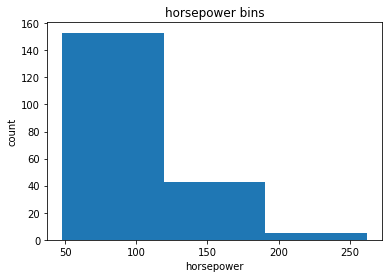

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import pyplot

a = (0,1,2)

plt.hist(cars_data["horsepower"], bins = 3)

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## Indicator variable (or dummy variable)

What is an indicator variable?
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Why we use indicator variables?
So we can use categorical variables for regression analysis in the later modules.

"fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 

In [21]:
fuel_indicator = pd.get_dummies(cars_data["fuel-type"])
fuel_indicator.head()

diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1

In [22]:
fuel_indicator.rename(columns={"fuel-type-gas":"gas", "fuel-type-diesel":"diesel"}, inplace = True)
fuel_indicator.head()

diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1

In [23]:
cars_data = pd.concat([cars_data, fuel_indicator], axis=1)
cars_data.drop("fuel-type", axis = 1, inplace = True)

In [24]:
cars_data.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length ...   \
0  convertible          rwd           front        88.6  0.811148 ...    
1  convertible          rwd           front        88.6  0.811148 ...    
2    hatchback          rwd           front        94.5  0.822681 ...    
3        sedan          fwd           front        99.8  0.848630 ...    
4        sedan          4wd           front        99.4  0.848630 ...    

   horsepower  peak-rpm  city-mpg highway-mpg    price  city-L/100km  \
0       111.0    5000.0        21          27  13495.0     11.190476   
1       111.0    5000.0        21          27  16500.0     11.190476   
2       154.0    5000.0        19          26  16500.0     12.368421   
3       102.0    5500.0        24          30  13950.0      9.791667   
4       115.0    5500.0        18          22  17450.0     13.055556   

  highway-L/100km  horsepower-binned  diesel  gas  
0        8.703704             Medium       0    1  
1        8.703704             Medium       0    1  
2        9.038462             Medium       0    1  
3        7.833333             Medium       0    1  
4       10.681818             Medium       0    1  

[5 rows x 30 columns]

lets calculate the correlation between variables of type "int64" or "float64" using the method "corr"

In [25]:
corr = cars_data.corr()
corr

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.140019          -0.029862    0.493244  0.608971   
stroke             -0.008153           0.055045    0.158018  0.123952   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075819           0.217299    0.371147  0.579821   
peak-rpm            0.279740           0.239543   -0.360305 -0.285970   
city-mpg           -0.035527          -0.225016   -0.470606 -0.665192   
highway-mpg         0.036233          -0.181877   -0.543304 -0.698142   
price              -0.082391           0.133999    0.584642  0.690628   
city-L/100km        0.066171           0.238567    0.476153  0.657373   
highway-L/100km    -0.029807           0.181189    0.577576  0.707108   
diesel             -0.196735          -0.101546    0.307237  0.211187   
gas                 0.196735           0.101546   -0.307237 -0.211187   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.242423 -0.550160    -0.233118    -0.110581 -0.140019   
normalized-losses  0.086802 -0.373737     0.099404     0.112360 -0.029862   
wheel-base         0.814507  0.590742     0.782097     0.572027  0.493244   
length             0.857170  0.492063     0.880665     0.685025  0.608971   
width              1.000000  0.306002     0.866201     0.729436  0.544885   
height             0.306002  1.000000     0.307581     0.074694  0.180449   
curb-weight        0.866201  0.307581     1.000000     0.849072  0.644060   
engine-size        0.729436  0.074694     0.849072     1.000000  0.572609   
bore               0.544885  0.180449     0.644060     0.572609  1.000000   
stroke             0.188822 -0.060663     0.167438     0.205928 -0.055390   
compression-ratio  0.189867  0.259737     0.156433     0.028889  0.001263   
horsepower         0.615077 -0.087027     0.757976     0.822676  0.566936   
peak-rpm          -0.245800 -0.309974    -0.279361    -0.256733 -0.267392   
city-mpg          -0.633531 -0.049800    -0.749543    -0.650546 -0.582027   
highway-mpg       -0.680635 -0.104812    -0.794889    -0.679571 -0.591309   
price              0.751265  0.135486     0.834415     0.872335  0.543155   
city-L/100km       0.673363  0.003811     0.785353     0.745059  0.554610   
highway-L/100km    0.736728  0.084301     0.836921     0.783465  0.559112   
diesel             0.244356  0.281578     0.221046     0.070779  0.054458   
gas               -0.244356 -0.281578    -0.221046    -0.070779 -0.054458   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.008153          -0.182196    0.075819  0.279740   
normalized-losses  0.055045          -0.114713    0.217299  0.239543   
wheel-base         0.158018           0.250313    0.371147 -0.360305   
length             0.123952           0.159733    0.579821 -0.285970   
width              0.188822           0.189867    0.615077 -0.245800   
height            -0.060663           0.259737   -0.087027 -0.309974   
curb-weight        0.167438           0.156433    0.757976 -0.279361   
engine-size        0.205928           0.028889    0.822676 -0.256733   
bore              -0.055390           0.001263    0.566936 -0.267392   
stroke             1.000000           0.187871    0.098267 -0.063561   
compression-ratio  0.187871           1.000000   -0.214514 -0.435780   
hor

Lets plot the correlation between variable on a heatmap

In [26]:
import seaborn as sns

In [27]:
def heat_map(df):
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(20, 20))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [28]:
heat_map(cars_data)

## Continuous numerical variables:

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

Lets look at the correlation between some continous variable and plot their respective scatter plot

In [29]:
cars_data[["engine-size", "highway-mpg", "peak-rpm", "stroke", "price"]].corr()

engine-size  highway-mpg  peak-rpm    stroke     price
engine-size     1.000000    -0.679571 -0.256733  0.205928  0.872335
highway-mpg    -0.679571     1.000000 -0.058598 -0.034636 -0.704692
peak-rpm       -0.256733    -0.058598  1.000000 -0.063561 -0.101616
stroke          0.205928    -0.034636 -0.063561  1.000000  0.082269
price           0.872335    -0.704692 -0.101616  0.082269  1.000000

C:\Users\rocks\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


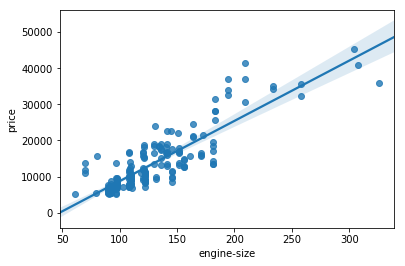

In [30]:
sns.regplot(x = "engine-size", y = "price", data = cars_data)

#### Positive linear relationship
The correlation between 'engine-size' and 'price' is approximately 0.87

From the scatterplot we can observe as the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line. 

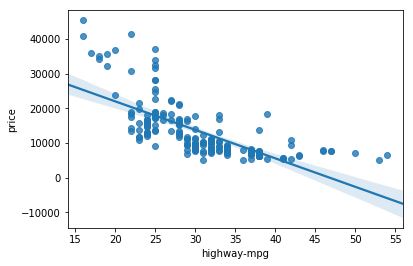

In [31]:
sns.regplot(x = "highway-mpg", y = "price", data = cars_data)

#### Negative linear relationship

The correlation between 'highway-mpg' and 'price' is approximately -0.704

From the scatterplot we can observe as the highway-mpg goes up, the price goes down: this indicates an inverse/ negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

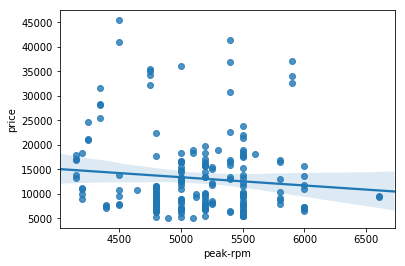

In [32]:
sns.regplot(x = "peak-rpm", y = "price", data = cars_data)

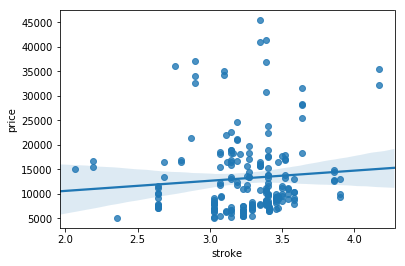

In [33]:
sns.regplot(x = "stroke", y = "price", data = cars_data)

#### Weak Linear Relationship

'Peak-rpm' and 'stroke' do not seem like a good predictor of the price at all since the regression lines are close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

## Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

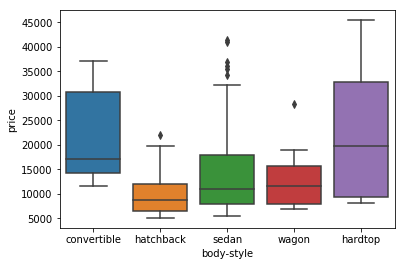

In [34]:
sns.boxplot(x = "body-style", y = "price", data = cars_data)

We see that the distributions of 'price' between the different 'body-style' categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price" :

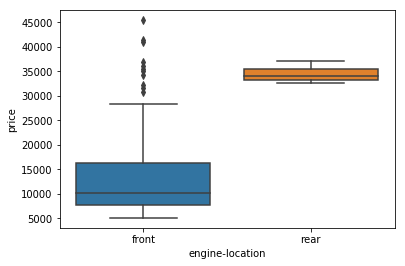

In [35]:
sns.boxplot(x = "engine-location", y = "price", data = cars_data)

Here we see that the distribution of 'price' between these two 'engine-location' categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

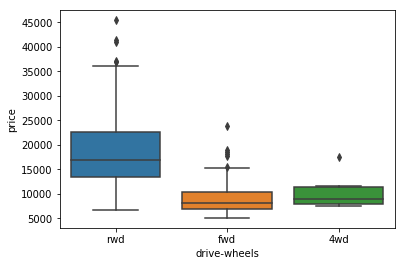

In [36]:
# drive-wheels
sns.boxplot(x = "drive-wheels", y = "price", data = cars_data)

Here we see that the distribution of 'price' between the different 'drive-wheels' categories differs as such drive-wheels could potentially be a predictor of price.

## Correlation and Causation

 **Correlation**: a measure of the extent of interdependence between variables.

**Causation**: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining  correlation is much simpler  the determining causation as causation may require independent experimentation 

## Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- **1**: total positive linear correlation,
- **0**: no linear correlation, the two variables most likely do not affect each other
- **-1**: total negative linear correlation.


In [37]:
cars_data.corr()

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.140019          -0.029862    0.493244  0.608971   
stroke             -0.008153           0.055045    0.158018  0.123952   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075819           0.217299    0.371147  0.579821   
peak-rpm            0.279740           0.239543   -0.360305 -0.285970   
city-mpg           -0.035527          -0.225016   -0.470606 -0.665192   
highway-mpg         0.036233          -0.181877   -0.543304 -0.698142   
price              -0.082391           0.133999    0.584642  0.690628   
city-L/100km        0.066171           0.238567    0.476153  0.657373   
highway-L/100km    -0.029807           0.181189    0.577576  0.707108   
diesel             -0.196735          -0.101546    0.307237  0.211187   
gas                 0.196735           0.101546   -0.307237 -0.211187   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.242423 -0.550160    -0.233118    -0.110581 -0.140019   
normalized-losses  0.086802 -0.373737     0.099404     0.112360 -0.029862   
wheel-base         0.814507  0.590742     0.782097     0.572027  0.493244   
length             0.857170  0.492063     0.880665     0.685025  0.608971   
width              1.000000  0.306002     0.866201     0.729436  0.544885   
height             0.306002  1.000000     0.307581     0.074694  0.180449   
curb-weight        0.866201  0.307581     1.000000     0.849072  0.644060   
engine-size        0.729436  0.074694     0.849072     1.000000  0.572609   
bore               0.544885  0.180449     0.644060     0.572609  1.000000   
stroke             0.188822 -0.060663     0.167438     0.205928 -0.055390   
compression-ratio  0.189867  0.259737     0.156433     0.028889  0.001263   
horsepower         0.615077 -0.087027     0.757976     0.822676  0.566936   
peak-rpm          -0.245800 -0.309974    -0.279361    -0.256733 -0.267392   
city-mpg          -0.633531 -0.049800    -0.749543    -0.650546 -0.582027   
highway-mpg       -0.680635 -0.104812    -0.794889    -0.679571 -0.591309   
price              0.751265  0.135486     0.834415     0.872335  0.543155   
city-L/100km       0.673363  0.003811     0.785353     0.745059  0.554610   
highway-L/100km    0.736728  0.084301     0.836921     0.783465  0.559112   
diesel             0.244356  0.281578     0.221046     0.070779  0.054458   
gas               -0.244356 -0.281578    -0.221046    -0.070779 -0.054458   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.008153          -0.182196    0.075819  0.279740   
normalized-losses  0.055045          -0.114713    0.217299  0.239543   
wheel-base         0.158018           0.250313    0.371147 -0.360305   
length             0.123952           0.159733    0.579821 -0.285970   
width              0.188822           0.189867    0.615077 -0.245800   
height            -0.060663           0.259737   -0.087027 -0.309974   
curb-weight        0.167438           0.156433    0.757976 -0.279361   
engine-size        0.205928           0.028889    0.822676 -0.256733   
bore              -0.055390           0.001263    0.566936 -0.267392   
stroke             1.000000           0.187871    0.098267 -0.063561   
compression-ratio  0.187871           1.000000   -0.214514 -0.435780   
hor

**P-value**: 
What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. 

By convention, when the 
- p-value is < 0.001 we say there is strong evidence that the correlation is significant,
- the p-value is < 0.05; there is moderate evidence that the correlation is significant,
- the p-value is < 0.1; there is weak evidence that the correlation is significant, and
- the p-value is > 0.1; there is no evidence that the correlation is significant.

In [38]:
from scipy import stats

In [39]:
variables = ["wheel-base", "horsepower", "length", "width", "curb-weight", "engine-size", "bore", "city-mpg", "highway-mpg"]
for var in variables:
    pearson_coef, p_value = stats.pearsonr(cars_data[var], cars_data["price"])    
    print(var + ": [" + str(pearson_coef) + ", " + str(p_value) +"] ")

wheel-base: [0.5846418222655081, 8.076488270732955e-20] 
horsepower: [0.8095745670036559, 6.36905742825998e-48] 
length: [0.6906283804483642, 8.016477466158713e-30] 
width: [0.7512653440522673, 9.20033551048166e-38] 
curb-weight: [0.8344145257702846, 2.1895772388936997e-53] 
engine-size: [0.8723351674455185, 9.265491622197996e-64] 
bore: [0.5431553832626602, 8.049189483935364e-17] 
city-mpg: [-0.6865710067844677, 2.3211320655676368e-29] 
highway-mpg: [-0.7046922650589529, 1.7495471144476807e-31] 


All the variables taken have displayed a p-value < 0.001 between them and price making them statistically significant 

However, 'wheel-base' and 'bore' have poor pearson correlation coefficient making their linear relationship moderate

### ANOVA: Analysis of Variance
The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells how statistically significant is our calculated score value

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

Let's see if different types 'drive-wheels' impact  'price', we group the data.

In [40]:
drive_wheels_group = cars_data[['drive-wheels','price']].groupby(['drive-wheels'])
drive_wheels_group.head()

drive-wheels    price
0            rwd  13495.0
1            rwd  16500.0
2            rwd  16500.0
3            fwd  13950.0
4            4wd  17450.0
5            fwd  15250.0
6            fwd  17710.0
7            fwd  18920.0
8            fwd  23875.0
9            rwd  16430.0
10           rwd  16925.0
136          4wd   7603.0
140          4wd   9233.0
141          4wd  11259.0
144          4wd   8013.0

we can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [41]:
f_val, p_val = stats.f_oneway(drive_wheels_group.get_group("fwd")["price"], drive_wheels_group.get_group("rwd")["price"], drive_wheels_group.get_group("4wd")["price"])  
print("ANOVA results: F = ", f_val, ", P = ", p_val)   

ANOVA results: F =  67.95406500780399 , P =  3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

Lets find out by obtaining ANOVA seperately on the 'drive-wheels' group

In [42]:
f_val, p_val = stats.f_oneway(drive_wheels_group.get_group("fwd")["price"], drive_wheels_group.get_group("rwd")["price"])  
print("ANOVA results: F = ", f_val, ", P = ", p_val )

ANOVA results: F =  130.5533160959111 , P =  2.2355306355677845e-23


In [43]:
f_val, p_val = stats.f_oneway(drive_wheels_group.get_group("4wd")["price"], drive_wheels_group.get_group("rwd")["price"])  
print("ANOVA results: F = ", f_val, ", P = ", p_val)   

ANOVA results: F =  8.580681368924756 , P =  0.004411492211225333


In [44]:
f_val, p_val = stats.f_oneway(drive_wheels_group.get_group("4wd")["price"], drive_wheels_group.get_group("fwd")["price"])  
print("ANOVA results: F = ", f_val, ", P = ", p_val)   

ANOVA results: F =  0.665465750252303 , P =  0.41620116697845666


## Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Curb-weight
- Engine-size
- Horsepower
- Highway-mpg

Categorical variables:
- Drive-wheels

AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

# Model Evaluation

A function for distribution plot

In [45]:
def distribution_plot(red_function, blue_function, red_name, blue_name, title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))

    ax1 = sns.distplot(red_function, hist = False, color = "r", label = red_name)
    ax2 = sns.distplot(blue_function, hist = False, color = "b", label = blue_name, ax = ax1)

    plt.title(title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of Cars")

    plt.show()

## Training and Testing

Now we randomly split our data into training and testing data  using the function **train_test_split** 

In [46]:
x_data = cars_data.drop("price", axis=1)
y_data = cars_data["price"]

In [47]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("Test Samples :", x_test.shape[0])
print("Training Samples:", x_train.shape[0])

Test Samples : 31
Training Samples: 170


## Linear Regression

As the relationship between variables as seen earlier is linear lets apply **Linear Regression** and observe the results

Let's import **LinearRegression** from the module **linear_model**

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
linear_reg = LinearRegression()
linear_reg.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Lets predict and plot training data and testing data on distribution plot

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [51]:
yhat_train = linear_reg.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test = linear_reg.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

C:\Users\rocks\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


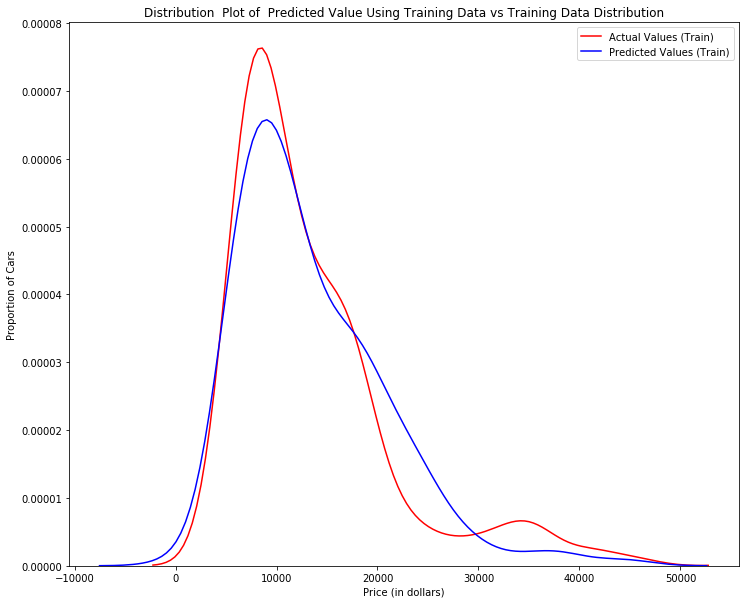

In [52]:
title = "Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution"
distribution_plot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", title)

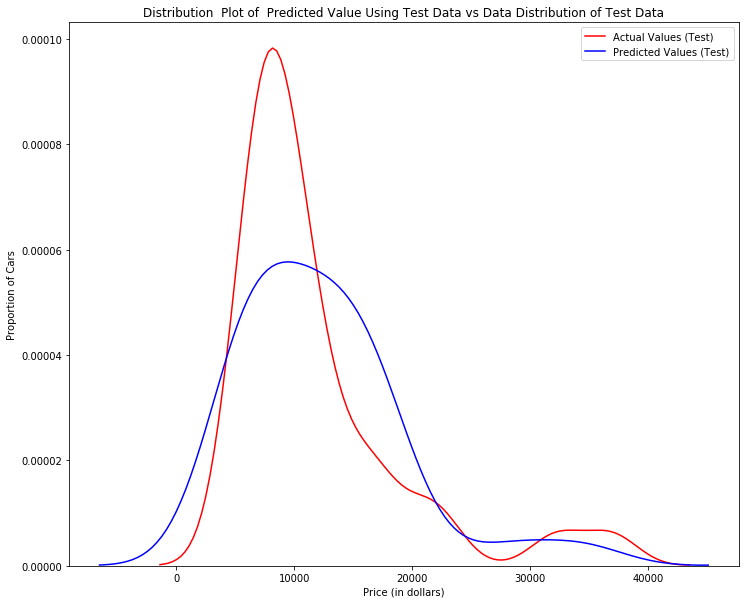

In [53]:
title = "Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data"
distribution_plot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", title)

Comparing above two graphs it is evident that the distribution of the prediction values in training set is much better at fitting the data where as prediction in testing set from range 5,000 to 15,000 is different

## Ridge regression 

We will impelement Ridge Regression to observe how alpha changes the model

Let's use 55 percent of the data for testing and the rest for training

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Let's perform a degree two polynomial transformation on our data

In [55]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
x_test_pf = pf.fit_transform(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
x_data_pf = pf.fit_transform(x_data[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])

 Let's import  **Ridge**  from the module **linear models**.

In [56]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(x_train_pf, y_train)

C:\Users\rocks\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.053428e-16
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
ridge_model.score(x_test_pf, y_test)

0.604956874504272

In [58]:
yhat = ridge_model.predict(x_test_pf)

In [59]:
print("predicted:", yhat[0:4])
print("test set :", y_test[0:4].values)

predicted: [ 6308.50636657 10409.96072663 20534.49224708 19277.30770253]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alfa that minimizes the test error

In [60]:
rsqu_test=[]
rsqu_train=[]
param = 5000*np.array(range(0,10000))

for alfa in param:
    ridge_model = Ridge(alpha=alfa) 
    ridge_model.fit(x_train_pf, y_train)
    rsqu_test.append(ridge_model.score(x_test_pf, y_test))
    rsqu_train.append(ridge_model.score(x_train_pf, y_train))

We can plot out the value of R^2 for different alphas

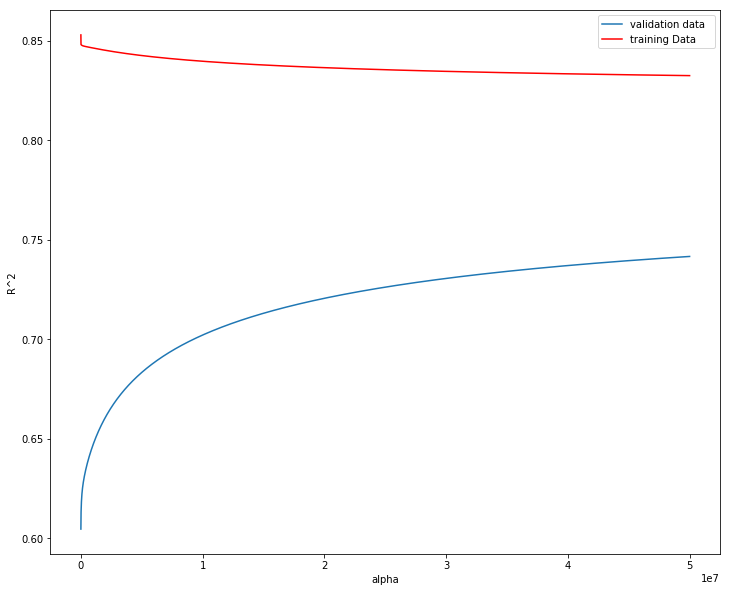

In [61]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(param, rsqu_test, label = 'validation data  ')
plt.plot(param, rsqu_train, 'r', label = 'training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of alfa

The red line in figure 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases

## Grid Search

The term alfa is a hyperparameter, sklearn has the class  **GridSearchCV** to make the process of finding the best hyperparameter simpler.

Let's import **GridSearchCV** from  the module **model_selection**

In [62]:
from sklearn.model_selection import GridSearchCV

#We create a dictionary of parameter values:
parameters = [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]}]
grid = GridSearchCV(Ridge(), parameters, cv=4)
grid.fit(x_data_pf, y_data)

C:\Users\rocks\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.672994e-19
  overwrite_a=True).T
C:\Users\rocks\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.506527e-19
  overwrite_a=True).T
C:\Users\rocks\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.611745e-19
  overwrite_a=True).T
C:\Users\rocks\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.203167e-19
  overwrite_a=True).T
C:\Users

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

We can now obtain best alpha using 'best_params_' paramenter

In [63]:
grid.best_params_['alpha']

100

Lets use this best alpha in our ridge regression model to obtain the best score

In [64]:
ridge_model_bf = Ridge(alpha = grid.best_params_['alpha'])
ridge_model_bf.fit(x_train_pf, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
ridge_model_bf.score(x_test_pf, y_test)

0.6148364132641067

- Ridge Score when alpha is 0 is 0.604956874504272
- Ridge Score when alpha is 100 is 0.6148364132641067